## Part1 Data organization and Data Exploration

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import json
import numpy as np
import pandas as pd
from collections import Counter
import re
import matplotlib.pyplot as plt
%matplotlib inline
import random
random.seed(1234)

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from scipy import sparse
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

In [39]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [4]:
drug_reviews = pd.read_csv('drug_reviews.csv')

In [8]:
drug_reviews = drug_reviews.dropna()

In [9]:
drug_reviews.head()

,Unnamed: 0,drug_name,date,condition,effect,ease,satisfy,helpful,review
0,0,abilify,4/18/2021,Additional Medications to Treat Depression,5,5,5,1.0,No Script or health Insurance needed to place ...
2,2,abilify,4/6/2021,Additional Medications to Treat Depression,5,5,5,1.0,I started taking Abilify 2mg by itself. I had ...
3,3,abilify,4/6/2021,Additional Medications to Treat Depression,1,3,1,1.0,I had horrible akathisia and wanted to crawl o...
5,5,abilify,3/27/2021,Additional Medications to Treat Depression,4,5,4,1.0,Abilify was added to already existing bipolar ...
6,6,abilify,2/21/2021,Schizophrenia,5,5,5,1.0,Hey y'all i jus wanna say this medicine has wo...


In [16]:
drug_reviews.dtypes

Unnamed: 0      int64
drug_name      object
date           object
condition      object
effect          int64
ease            int64
satisfy         int64
helpful       float64
review         object
dtype: object

In [17]:
drug_reviews.shape

(59559, 9)

In [19]:
drug_reviews[['day','month','year']] = drug_reviews.date.str.split('/', expand=True)

In [20]:
drug_reviews['is_effect'] = np.where(drug_reviews['effect'] >=4.0, 1, 0)
drug_reviews['is_ease'] = np.where(drug_reviews['ease'] == 5.0, 1, 0)
drug_reviews['is_satisfy'] = np.where(drug_reviews['satisfy'] >= 4.0, 1, 0)
drug_reviews['is_helpful'] = np.where(drug_reviews['helpful'] > 6.0, 1, 0)

In [21]:
drug_reviews = drug_reviews.drop(columns=['Unnamed: 0'])

In [115]:
drug_reviews = drug_reviews.reset_index()

In [117]:
drug_reviews = drug_reviews.drop(columns=['index'])

In [45]:
drug_reviews.head(5)

,drug_name,date,condition,effect,ease,satisfy,helpful,review,month,day,year,is_effect,is_ease,is_satisfy,is_helpful
0,abilify,4/18/2021,Additional Medications to Treat Depression,5,5,5,1.0,No Script or health Insurance needed to place ...,4,18,2021,1,1,1,0
1,abilify,4/6/2021,Additional Medications to Treat Depression,5,5,5,1.0,I started taking Abilify 2mg by itself. I had ...,4,6,2021,1,1,1,0
2,abilify,4/6/2021,Additional Medications to Treat Depression,1,3,1,1.0,I had horrible akathisia and wanted to crawl o...,4,6,2021,0,0,0,0
3,abilify,3/27/2021,Additional Medications to Treat Depression,4,5,4,1.0,Abilify was added to already existing bipolar ...,3,27,2021,1,1,1,0
4,abilify,2/21/2021,Schizophrenia,5,5,5,1.0,Hey y'all i jus wanna say this medicine has wo...,2,21,2021,1,1,1,0


In [16]:
drug_reviews.shape

(59559, 15)

In [161]:
drug_reviews.describe()

,effect,ease,satisfy,helpful,month,day,year,is_effect,is_ease,is_satisfy,is_helpful
count,59559.000000,59559.000000,59559.000000,59559.000000,59559.000000,59559.000000,59559.000000,59559.000000,59559.000000,59559.000000,59559.000000
mean,3.481909,4.043453,3.055374,8.729008,6.233298,16.149633,2010.945164,0.578233,0.548465,0.468124,0.443258
std,1.491394,1.334193,1.622513,10.061858,3.567221,8.770033,3.452101,0.493846,0.497650,0.498987,0.496774
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2007.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,4.000000,1.000000,2.000000,3.000000,9.000000,2009.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,5.000000,3.000000,6.000000,6.000000,17.000000,2010.000000,1.000000,1.000000,0.000000,0.000000
75%,5.000000,5.000000,5.000000,11.000000,10.000000,23.000000,2012.000000,1.000000,1.000000,1.000000,1.000000
max,5.000000,5.000000,5.000000,158.000000,12.000000,31.000000,2021.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
drug_reviews.to_csv(r'drug_reviews_new.csv', index = True, header=True)

In [4]:
drug_reviews = pd.read_csv('drug_reviews_new.csv')

### Data Exploration

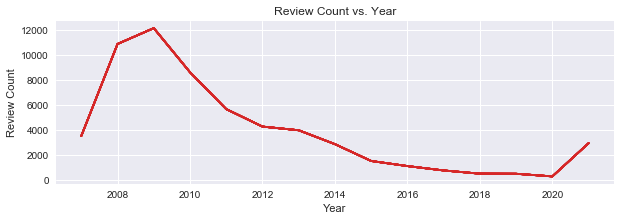

In [28]:
fig, ax = plt.subplots(1,1, figsize=(10,3))
plt.style.use('seaborn')
# Review count by year
ax.plot(drug_reviews.groupby('year').count(), color = 'tab:red')
ax.set_ylabel('Review Count')
ax.set_xlabel('Year')
ax.set_title('Review Count vs. Year')
plt.show()

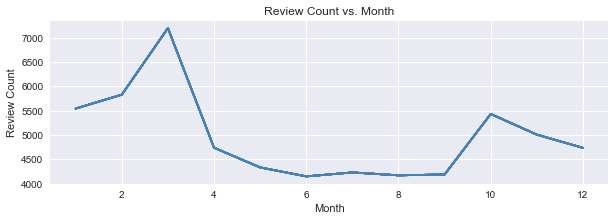

In [29]:
fig, ax = plt.subplots(1,1, figsize=(10,3))
plt.style.use('seaborn')
ax.plot(drug_reviews.groupby('month').count(), color = 'steelblue')
ax.set_ylabel('Review Count')
ax.set_xlabel('Month')
#ax.set_xticks(range(1,13))
ax.set_title('Review Count vs. Month')
plt.show()

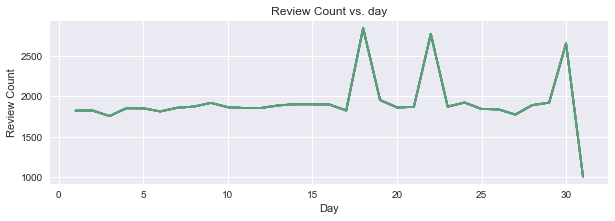

In [26]:
fig, ax = plt.subplots(1,1, figsize=(10,3))
plt.style.use('seaborn')
ax.plot(drug_reviews.groupby('day').count())
ax.set_ylabel('Review Count')
ax.set_xlabel('Day')
#ax[2].set_xticks(range(1,32))
ax.set_title('Review Count vs. day')
plt.show()

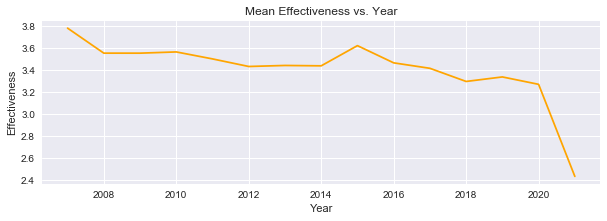

In [33]:
fig, ax = plt.subplots(1,1, figsize=(10,3))
plt.style.use('seaborn')
# Review count by year
ax.plot(drug_reviews.groupby('year').effect.mean(), color = 'orange')
ax.set_ylabel('Effectiveness')
ax.set_xlabel('Year')
ax.set_title('Mean Effectiveness vs. Year')
plt.show()

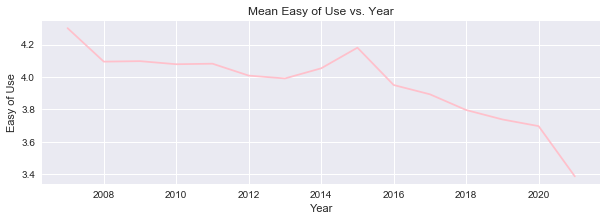

In [34]:
fig, ax = plt.subplots(1,1, figsize=(10,3))
plt.style.use('seaborn')
# Review count by year
ax.plot(drug_reviews.groupby('year').ease.mean(), color = 'pink')
ax.set_ylabel('Easy of Use')
ax.set_xlabel('Year')
ax.set_title('Mean Easy of Use vs. Year')
plt.show()

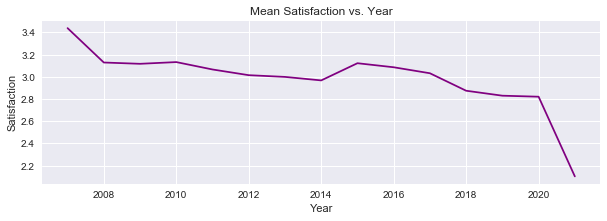

In [35]:
fig, ax = plt.subplots(1,1, figsize=(10,3))
plt.style.use('seaborn')
# Review count by year
ax.plot(drug_reviews.groupby('year').satisfy.mean(), color = 'purple')
ax.set_ylabel('Satisfaction')
ax.set_xlabel('Year')
ax.set_title('Mean Satisfaction vs. Year')
plt.show()

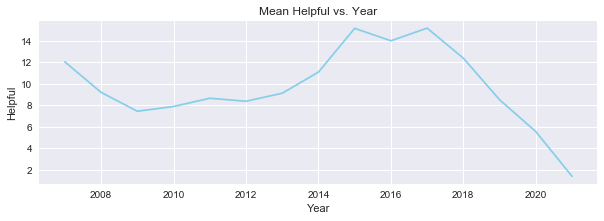

In [37]:
fig, ax = plt.subplots(1,1, figsize=(10,3))
plt.style.use('seaborn')
# Review count by year
ax.plot(drug_reviews.groupby('year').helpful.mean(), color = 'skyblue')
ax.set_ylabel('Helpful')
ax.set_xlabel('Year')
ax.set_title('Mean Helpful vs. Year')
plt.show()

In [38]:
drug_reviews_5 = drug_reviews[drug_reviews['effect'] == 5]
drug_reviews_1 = drug_reviews[drug_reviews['effect'] == 1]

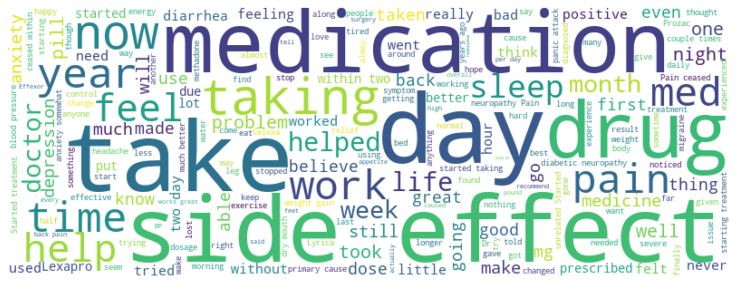

In [42]:
text5 = " ".join(review for review in drug_reviews_5.review)
wordcloud = WordCloud(width=800, height=300,background_color="white").generate(text5)
plt.figure(figsize=(20,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

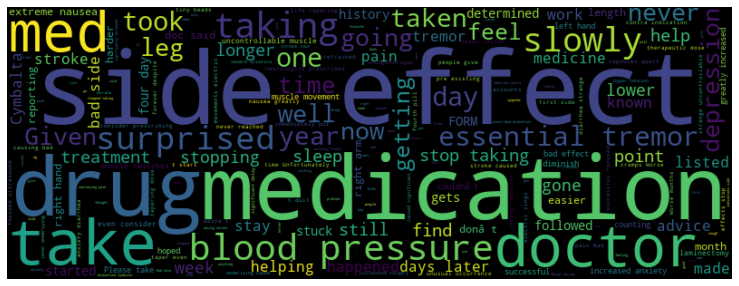

In [43]:
text1 = " ".join(review for review in drug_reviews_1.review)
wordcloud = WordCloud(width=800, height=300,background_color="black").generate(text1)
plt.figure(figsize=(20,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [58]:
#create token with stopwords which will be used for bigram and trigram
review_text = drug_reviews['review'].to_list()
TOKENIZER = RegexpTokenizer(r'\w+')
review_list_1 = []
for line in review_text:
    token_list = [w for w in TOKENIZER.tokenize(line.lower()) if w.isnumeric()==False]
    review_list_1.append(token_list)

In [61]:
#processed_docs is the token list for the tokens converted into stems, the details are shown in part3
drug_reviews['token_stem'] = processed_docs.tolist()
drug_reviews['tokens'] = review_list_1

In [62]:
drug_reviews.head(1)

,drug_name,date,condition,effect,ease,satisfy,helpful,review,month,day,year,is_effect,is_ease,is_satisfy,is_helpful,token_stem,tokens
0,abilify,4/18/2021,Additional Medications to Treat Depression,5,5,5,1.0,No Script or health Insurance needed to place ...,4,18,2021,1,1,1,0,"[script, health, insur, need, place, order, di...","[no, script, or, health, insurance, needed, to..."


In [63]:
drug_reviews_5 = drug_reviews[drug_reviews['effect'] == 5]
drug_reviews_1 = drug_reviews[drug_reviews['effect'] == 1]

In [65]:
token5 = [item for sublist in drug_reviews_5.token_stem.tolist() for item in sublist]
token1 = [item for sublist in drug_reviews_1.token_stem.tolist() for item in sublist]

In [66]:
token5_dic = Counter(token5).most_common(100)
token1_dic = Counter(token1).most_common(100)

In [67]:
tokenlist5 = [t[0] for t in token5_dic]
tokenlist1 = [t[0] for t in token1_dic]

In [68]:
token_share = [t for t in tokenlist5 if t in tokenlist1]

In [69]:
len(token_share)

47

In [101]:
tokenlist5_new = [t for t in tokenlist5 if t not in token_share]
tokenlist1_new = [t for t in tokenlist1 if t not in token_share]

In [102]:
tokenlist5_count = [dict(token5_dic)[t] for t in tokenlist5_new[0:20]]
tokenlist1_count = [dict(token1_dic)[t] for t in tokenlist1_new[0:20]]

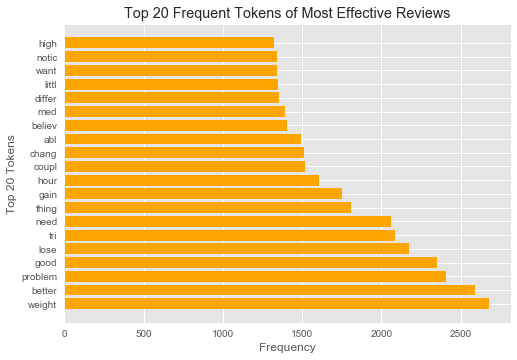

In [105]:
plt.style.use('ggplot')
x = tokenlist5_new[0:20]
x_pos = [i for i, _ in enumerate(x)]
plt.barh(x_pos, tokenlist5_count, color='orange')
plt.xlabel("Frequency")
plt.ylabel("Top 20 Tokens")
plt.title("Top 20 Frequent Tokens of Most Effective Reviews")
plt.yticks(x_pos, x)
plt.show()

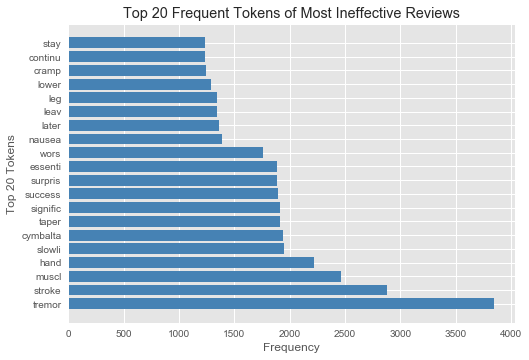

In [106]:
plt.style.use('ggplot')
x = tokenlist1_new[0:20]
x_pos = [i for i, _ in enumerate(x)]
plt.barh(x_pos, tokenlist1_count, color='steelblue')
plt.xlabel("Frequency")
plt.ylabel("Top 20 Tokens")
plt.title("Top 20 Frequent Tokens of Most Ineffective Reviews")
plt.yticks(x_pos, x)
plt.show()

In [72]:
from nltk.collocations import BigramAssocMeasures, TrigramAssocMeasures, BigramCollocationFinder
def creat_bigram(words):
    bigram_measures = BigramAssocMeasures()
    finder = BigramCollocationFinder.from_words(words)

    finder.apply_freq_filter(1) 
    return finder.nbest(bigram_measures.pmi, 10)

In [73]:
review_list5 = drug_reviews_5['tokens'].tolist()
bigram_list5 = []
for row in review_list5:
    bigram = creat_bigram(row)
    bigram_list5.append(bigram)

review_list1 = drug_reviews_1['tokens'].tolist()
bigram_list1 = []
for row in review_list1:
    bigram = creat_bigram(row)
    bigram_list1.append(bigram)

In [76]:
bigram_list5 = [item for sublist in bigram_list5 for item in sublist]
bigram_list1 = [item for sublist in bigram_list1 for item in sublist]

In [77]:
bigram5_dic = Counter(bigram_list5).most_common(100)
bigram1_dic = Counter(bigram_list1).most_common(100)

In [79]:
bigram5 = [b[0] for b in bigram5_dic]
bigram1 = [b[0] for b in bigram1_dic]

In [80]:
overlap = [b for b in bigram5 if b in bigram1]

In [81]:
len(overlap)

52

In [110]:
bigram5_new = [(b[0]+ ' ' + b[1]) for b in bigram5 if b not in overlap]
bigram1_new = [(b[0]+ ' ' + b[1]) for b in bigram1 if b not in overlap]

In [94]:
bigram5_count = [dict(bigram5_dic)[t] for t in bigram5_new[0:20]]
bigram1_count = [dict(bigram1_dic)[t] for t in bigram1_new[0:20]]

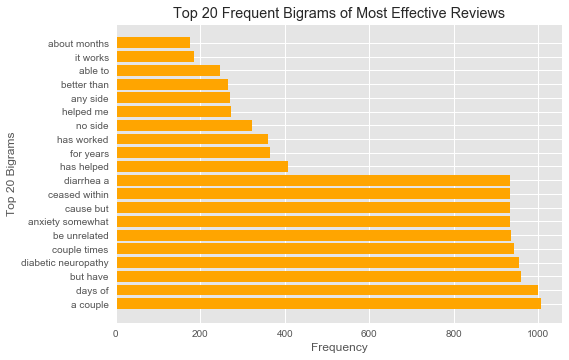

In [111]:
plt.style.use('ggplot')
x = bigram5_new[0:20]
x_pos = [i for i, _ in enumerate(x)]
plt.barh(x_pos, bigram5_count, color='orange')
plt.xlabel("Frequency")
plt.ylabel("Top 20 Bigrams")
plt.title("Top 20 Frequent Bigrams of Most Effective Reviews")
plt.yticks(x_pos, x)
plt.show()

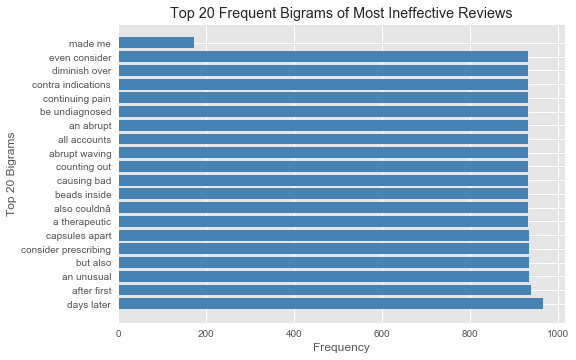

In [112]:
plt.style.use('ggplot')
x = bigram1_new[0:20]
x_pos = [i for i, _ in enumerate(x)]
plt.barh(x_pos, bigram1_count, color='steelblue')
plt.xlabel("Frequency")
plt.ylabel("Top 20 Bigrams")
plt.title("Top 20 Frequent Bigrams of Most Ineffective Reviews")
plt.yticks(x_pos, x)
plt.show()

### Create one-hot-vector matrix, prepare for classification 

In [122]:
review_text = drug_reviews['review'].to_list()

In [123]:
STOPWORDS = set(stopwords.words("english"))
TOKENIZER = RegexpTokenizer(r'\w+')

In [124]:
review_list = []
total_tokens = []
for line in review_text:
    token_list = [w for w in TOKENIZER.tokenize(line.lower()) if (w not in STOPWORDS) and (w.isnumeric()==False)]
    review_list.append(token_list)
    total_tokens += token_list


In [125]:
len(total_tokens)

1887270

In [45]:
word_counts = Counter(total_tokens)

In [46]:
len(word_counts)

40776

In [47]:
vocabulary = [w[0] for w in word_counts.most_common(10000)]

In [48]:
word_counts_new = {}
for w in vocabulary:
    word_counts_new[w]=word_counts[w]

In [194]:
#word_counts_new=sorted(word_counts_new.items(), key=lambda x: x[1], reverse=True)

In [49]:
top_words = [i for i in list(word_counts_new.keys())[0:30]]
top_counts = [i for i in list(word_counts_new.values())[0:30]]
top_df = pd.DataFrame({"Top_words":top_words, "Counts":top_counts})

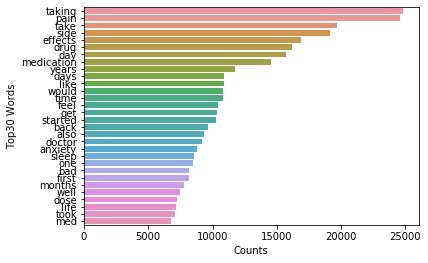

In [50]:
import seaborn as sns
axs = sns.barplot(x="Counts", y="Top_words", data=top_df)
axs.set_ylabel("Top30 Words",size=10)

plt.show()


In [52]:
vocab = {}
for i,w in enumerate(vocabulary):
    vocab[w] = i     

In [53]:
vectorize_sequence = []
for line in review_list:
    vector = np.zeros(10000)
    for w in line:
        try:
            vector[vocab[w]] += 1
        except:
            vector = vector
    vectorize_sequence.append(vector)

In [54]:
review_matrix = np.asarray(vectorize_sequence) 

In [55]:
review_sparse = sparse.csr_matrix(review_matrix)

In [56]:
review_sparse

<59559x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 1621127 stored elements in Compressed Sparse Row format>

In [57]:
review_matrix.shape

(59559, 10000)

In [58]:
from numpy import save
save('review_matrix.npy', review_matrix)

'''
from numpy import load
review_matrix = load('review_matrix.npy')
'''

"\nfrom numpy import load\nreview_matrix = load('review_matrix.npy')\n"

## Part2 Build Prediction System by Machine Learning and Evaluate the Models

### Naive Bayes

In [59]:
from sklearn.naive_bayes import MultinomialNB

In [60]:
y_effect = drug_reviews['is_effect']
y_ease = drug_reviews['is_ease']
y_satisfy = drug_reviews['is_satisfy']
y_helpful = drug_reviews['is_helpful']

In [61]:
x_train_effect, x_test_effect, y_train_effect, y_test_effect = train_test_split(review_sparse,y_effect,test_size = 0.3, random_state =100)
x_train_ease, x_test_ease, y_train_ease, y_test_ease = train_test_split(review_sparse,y_ease,test_size = 0.3, random_state =100)
x_train_satisfy, x_test_satisfy, y_train_satisfy, y_test_satisfy = train_test_split(review_sparse,y_satisfy,test_size = 0.3, random_state =100)
x_train_helpful, x_test_helpful, y_train_helpful, y_test_helpful = train_test_split(review_sparse,y_helpful,test_size = 0.3, random_state =100)

In [62]:
nb_effect = MultinomialNB()
nb_effect.fit(x_train_effect, y_train_effect)
predict_effect = nb_effect.predict(x_test_effect)

In [63]:
trainsc_effect=nb_effect.score(x_train_effect, y_train_effect)
trainsc_effect

0.7122400518097431

In [64]:
testsc_effect=nb_effect.score(x_test_effect, y_test_effect)
testsc_effect

0.6825050369375419

In [65]:
f1_effect = f1_score(y_test_effect,predict_effect)
f1_effect

0.7643026299389256

In [66]:
nb_ease = MultinomialNB()
nb_ease.fit(x_train_ease, y_train_ease)
predict_ease = nb_ease.predict(x_test_ease)
trainsc_ease=nb_ease.score(x_train_ease, y_train_ease)
testsc_ease=nb_ease.score(x_test_ease, y_test_ease)
f1_ease = f1_score(y_test_ease,predict_ease)
print("The accuracy of trainset:",trainsc_ease)
print("The accuracy of testset:",testsc_ease)
print("The f1 score of nb_ease:", f1_ease)

The accuracy of trainset: 0.6704804394233768
The accuracy of testset: 0.6512200582046116
The f1 score of nb_ease: 0.731471906239228


In [67]:
nb_satisfy = MultinomialNB()
nb_satisfy.fit(x_train_satisfy, y_train_satisfy)
predict_satisfy = nb_satisfy.predict(x_test_satisfy)
trainsc_satisfy=nb_satisfy.score(x_train_satisfy, y_train_satisfy)
testsc_satisfy=nb_satisfy.score(x_test_satisfy, y_test_satisfy)
f1_satisfy = f1_score(y_test_satisfy,predict_satisfy)
print("The accuracy of trainset:",trainsc_satisfy)
print("The accuracy of testset:",testsc_satisfy)
print("The f1 score of nb_satisfy:", f1_satisfy)

The accuracy of trainset: 0.734379122592406
The accuracy of testset: 0.7117752406536826
The f1 score of nb_satisfy: 0.7317149406126277


In [68]:
nb_helpful = MultinomialNB()
nb_helpful.fit(x_train_helpful, y_train_helpful)
predict_helpful = nb_helpful.predict(x_test_helpful)
trainsc_helpful=nb_helpful.score(x_train_helpful, y_train_helpful)
testsc_helpful=nb_helpful.score(x_test_helpful, y_test_helpful)
f1_helpful = f1_score(y_test_helpful,predict_helpful)
print("The accuracy of trainset:",trainsc_helpful)
print("The accuracy of testset:",testsc_helpful)
print("The f1 score of nb_helpful:", f1_helpful)

The accuracy of trainset: 0.5761915041615696
The accuracy of testset: 0.5535034698903067
The f1 score of nb_helpful: 0.6334313545304172


### LSTM

In [153]:
from numpy import load
review_matrix = load('review_matrix.npy')

In [154]:
from keras.preprocessing.text import Tokenizer
from keras import Sequential
from keras import models
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import text_to_word_sequence
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import EarlyStopping
from keras.layers import LSTM, Dropout, Dense, Embedding, Conv1D, MaxPooling1D, Bidirectional
from keras import layers
from keras.metrics import binary_accuracy
import tensorflow as tf

In [155]:
model = Sequential()
model.add(Embedding(10000, 128, input_length=100))
model.add(Dropout(0.3))
model.add(Conv1D(64, 10, activation='relu'))
model.add(MaxPooling1D(pool_size=5))
model.add(LSTM(128, dropout=0.3, recurrent_dropout=0.3))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
es = EarlyStopping(monitor='val_accuracy', mode='max', patience = 3)

In [156]:
x_train_effect1, x_test_effect1, y_train_effect1, y_test_effect1 = train_test_split(review_matrix,y_effect,test_size = 0.3, random_state =100)
x_train_ease1, x_test_ease1, y_train_ease1, y_test_ease1 = train_test_split(review_matrix,y_ease,test_size = 0.3, random_state =100)
x_train_satisfy1, x_test_satisfy1, y_train_satisfy1, y_test_satisfy1 = train_test_split(review_matrix,y_satisfy,test_size = 0.3, random_state =100)
x_train_helpful1, x_test_helpful1, y_train_helpful1, y_test_helpful1 = train_test_split(review_matrix,y_helpful,test_size = 0.3, random_state =100)

In [157]:
history_effect = model.fit(x_train_effect1, y_train_effect1, validation_split=0.3, epochs=4, callbacks=[es])


Epoch 1/4
912/912 [==============================] - 4137s 5s/step - loss: -97041448.0000 - accuracy: 0.1834 - val_loss: -389541344.0000 - val_accuracy: 0.1833
Epoch 2/4
912/912 [==============================] - 4705s 5s/step - loss: -1352626304.0000 - accuracy: 0.1834 - val_loss: -2749019648.0000 - val_accuracy: 0.1833
Epoch 3/4
912/912 [==============================] - 4587s 5s/step - loss: -5148854272.0000 - accuracy: 0.1834 - val_loss: -8058994176.0000 - val_accuracy: 0.1833
Epoch 4/4
912/912 [==============================] - 4526s 5s/step - loss: -12109819904.0000 - accuracy: 0.1834 - val_loss: -16755789824.0000 - val_accuracy: 0.1833


In [160]:
predict_effect1_ls = model.predict_classes(x_test_effect1)
f1_effect1_ls = f1_score(y_test_effect1,predict_effect1_ls, average = 'micro')
f1_effect1_ls

0.18793373628833668

### Regular Deep learning, "keras" model

In [74]:
import keras
keras.__version__

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

from keras import losses
from keras import metrics
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [75]:
history_effect = model.fit(x_train_effect1,
                    y_train_effect1,
                    validation_split=0.3,
                    epochs=20,
                    batch_size=128)

Epoch 1/20
228/228 [==============================] - 2s 10ms/step - loss: 0.5638 - binary_accuracy: 0.7110 - val_loss: 0.5245 - val_binary_accuracy: 0.7481
Epoch 2/20
228/228 [==============================] - 1s 4ms/step - loss: 0.4826 - binary_accuracy: 0.7740 - val_loss: 0.5268 - val_binary_accuracy: 0.7470
Epoch 3/20
228/228 [==============================] - 1s 4ms/step - loss: 0.4484 - binary_accuracy: 0.7896 - val_loss: 0.5324 - val_binary_accuracy: 0.7468
Epoch 4/20
228/228 [==============================] - 1s 5ms/step - loss: 0.4198 - binary_accuracy: 0.8039 - val_loss: 0.5445 - val_binary_accuracy: 0.7446
Epoch 5/20
228/228 [==============================] - 1s 5ms/step - loss: 0.3944 - binary_accuracy: 0.8184 - val_loss: 0.5576 - val_binary_accuracy: 0.7413
Epoch 6/20
228/228 [==============================] - 1s 4ms/step - loss: 0.3707 - binary_accuracy: 0.8311 - val_loss: 0.5892 - val_binary_accuracy: 0.7398
Epoch 7/20
228/228 [==============================] - 1s 5ms/st

In [76]:
predict_effect1 = model.predict_classes(x_test_effect1)
f1_effect1 = f1_score(y_test_effect1,predict_effect1)
f1_effect1

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


0.7472014481017483

In [77]:
history_dict1 = history_effect.history
history_dict1.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

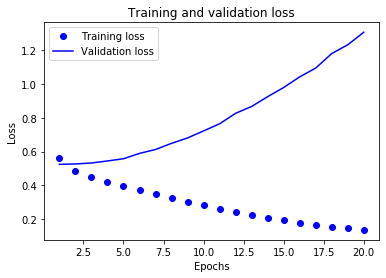

In [78]:
acc = history_effect.history['binary_accuracy']
val_acc = history_effect.history['val_binary_accuracy']
loss = history_effect.history['loss']
val_loss = history_effect.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

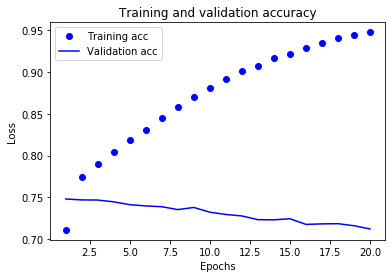

In [79]:
plt.clf()   # clear figure
acc_values = history_dict1['binary_accuracy']
val_acc_values = history_dict1['val_binary_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

ease

In [80]:
history_ease = model.fit(x_train_ease1,
                    y_train_ease1,
                    validation_split=0.3,
                    epochs=20,
                    batch_size=128)

Epoch 1/20
228/228 [==============================] - 2s 10ms/step - loss: 0.8479 - binary_accuracy: 0.6741 - val_loss: 0.6901 - val_binary_accuracy: 0.6412
Epoch 2/20
228/228 [==============================] - 1s 4ms/step - loss: 0.5738 - binary_accuracy: 0.7092 - val_loss: 0.6495 - val_binary_accuracy: 0.6517
Epoch 3/20
228/228 [==============================] - 1s 4ms/step - loss: 0.5214 - binary_accuracy: 0.7399 - val_loss: 0.6517 - val_binary_accuracy: 0.6552
Epoch 4/20
228/228 [==============================] - 1s 4ms/step - loss: 0.4842 - binary_accuracy: 0.7646 - val_loss: 0.6665 - val_binary_accuracy: 0.6561
Epoch 5/20
228/228 [==============================] - 1s 4ms/step - loss: 0.4525 - binary_accuracy: 0.7837 - val_loss: 0.6942 - val_binary_accuracy: 0.6547
Epoch 6/20
228/228 [==============================] - 1s 4ms/step - loss: 0.4245 - binary_accuracy: 0.8002 - val_loss: 0.7290 - val_binary_accuracy: 0.6558
Epoch 7/20
228/228 [==============================] - 1s 5ms/st

In [81]:
predict_ease1 = model.predict_classes(x_test_ease1)
f1_ease1 = f1_score(y_test_ease1,predict_ease1)
f1_ease1

0.6542577471217731

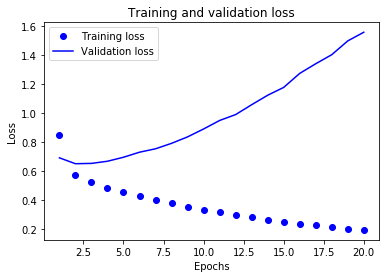

In [82]:
loss = history_ease.history['loss']
val_loss = history_ease.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

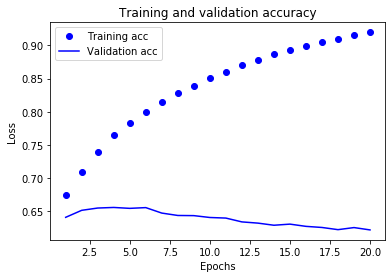

In [83]:
plt.clf()   # clear figure
acc_values = history_ease.history['binary_accuracy']
val_acc_values = history_ease.history['val_binary_accuracy']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [84]:
history_satisfy = model.fit(x_train_satisfy1,
                    y_train_satisfy1,
                    validation_split=0.3,
                    epochs=20,
                    batch_size=128)

Epoch 1/20
228/228 [==============================] - 2s 10ms/step - loss: 0.6500 - binary_accuracy: 0.7606 - val_loss: 0.6640 - val_binary_accuracy: 0.7047
Epoch 2/20
228/228 [==============================] - 1s 5ms/step - loss: 0.4206 - binary_accuracy: 0.8138 - val_loss: 0.6370 - val_binary_accuracy: 0.7338
Epoch 3/20
228/228 [==============================] - 1s 5ms/step - loss: 0.3605 - binary_accuracy: 0.8440 - val_loss: 0.6354 - val_binary_accuracy: 0.7394
Epoch 4/20
228/228 [==============================] - 1s 5ms/step - loss: 0.3209 - binary_accuracy: 0.8624 - val_loss: 0.6613 - val_binary_accuracy: 0.7446
Epoch 5/20
228/228 [==============================] - 1s 5ms/step - loss: 0.2906 - binary_accuracy: 0.8785 - val_loss: 0.6832 - val_binary_accuracy: 0.7457
Epoch 6/20
228/228 [==============================] - 1s 5ms/step - loss: 0.2658 - binary_accuracy: 0.8894 - val_loss: 0.7146 - val_binary_accuracy: 0.7428
Epoch 7/20
228/228 [==============================] - 1s 5ms/st

In [85]:
predict_satisfy1 = model.predict_classes(x_test_satisfy1)
f1_satisfy1 = f1_score(y_test_satisfy1,predict_satisfy1)
f1_satisfy1

0.7150015092061577

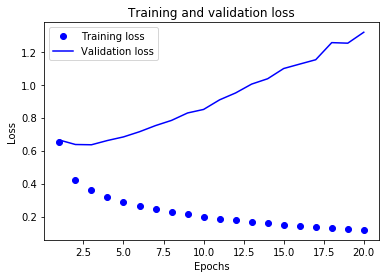

In [86]:
loss = history_satisfy.history['loss']
val_loss = history_satisfy.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

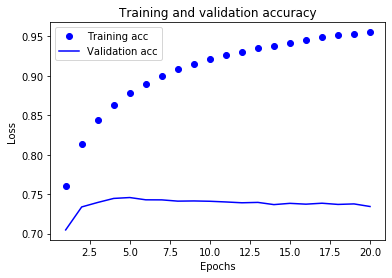

In [87]:
plt.clf()   # clear figure
acc_values = history_satisfy.history['binary_accuracy']
val_acc_values = history_satisfy.history['val_binary_accuracy']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [88]:
history_helpful = model.fit(x_train_helpful1,
                    y_train_helpful1,
                    validation_split=0.3,
                    epochs=20,
                    batch_size=128)

Epoch 1/20
228/228 [==============================] - 2s 9ms/step - loss: 1.3382 - binary_accuracy: 0.5232 - val_loss: 0.7177 - val_binary_accuracy: 0.5245
Epoch 2/20
228/228 [==============================] - 1s 4ms/step - loss: 0.6879 - binary_accuracy: 0.5388 - val_loss: 0.6726 - val_binary_accuracy: 0.5469
Epoch 3/20
228/228 [==============================] - 1s 5ms/step - loss: 0.6502 - binary_accuracy: 0.5636 - val_loss: 0.6607 - val_binary_accuracy: 0.5565
Epoch 4/20
228/228 [==============================] - 1s 4ms/step - loss: 0.6326 - binary_accuracy: 0.5786 - val_loss: 0.6579 - val_binary_accuracy: 0.5648
Epoch 5/20
228/228 [==============================] - 1s 4ms/step - loss: 0.6191 - binary_accuracy: 0.5875 - val_loss: 0.6584 - val_binary_accuracy: 0.5676
Epoch 6/20
228/228 [==============================] - 1s 4ms/step - loss: 0.6071 - binary_accuracy: 0.5983 - val_loss: 0.6615 - val_binary_accuracy: 0.5716
Epoch 7/20
228/228 [==============================] - 1s 5ms/ste

In [89]:
predict_helpful1 = model.predict_classes(x_test_helpful1)
f1_helpful1 = f1_score(y_test_helpful1,predict_helpful1)
f1_helpful1

0.6252303401563823

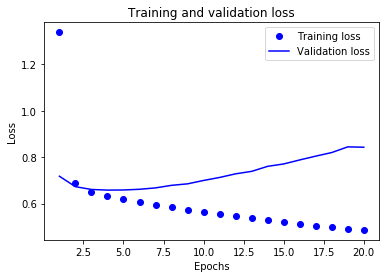

In [90]:
loss = history_helpful.history['loss']
val_loss = history_helpful.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

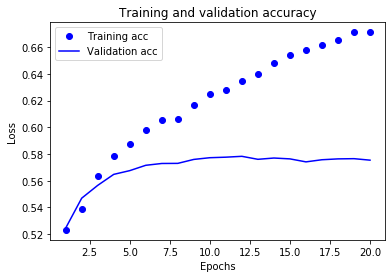

In [91]:
plt.clf()   # clear figure
acc_values = history_helpful.history['binary_accuracy']
val_acc_values = history_helpful.history['val_binary_accuracy']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Part3 Topic Modeling and Classification by Topic Modeling features

In [46]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
from sklearn.metrics import mean_absolute_error

In [47]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sarahzhao/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [48]:
stemmer = SnowballStemmer('english')

In [49]:
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

def preprocess(text):
    token_list = []
    for token in gensim.utils.simple_preprocess(text) :
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            token_list.append(lemmatize_stemming(token))
            
    return token_list

In [50]:
processed_docs = drug_reviews['review'].map(preprocess)

In [52]:
processed_docs[0:5]

0    [script, health, insur, need, place, order, di...
1    [start, take, abilifi, rough, effect, week, in...
2    [horribl, akathisia, want, crawl, skin, extrem...
3    [abilifi, add, exist, bipolar, med, citalopram...
4    [wanna, medicin, work, wonder, dose, gain, wei...
Name: review, dtype: object

In [53]:
len(processed_docs)

59559

In [135]:
dictionary = gensim.corpora.Dictionary(processed_docs)

In [136]:
len(dictionary)

26253

In [137]:
dictionary.filter_extremes(no_below=20, no_above=0.5)

In [138]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

In [139]:
lda_model =  gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 10, 
                                   id2word = dictionary,                                    
                                   passes = 10,
                                   workers = 2)

In [141]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.026*"depress" + 0.022*"year" + 0.022*"life" + 0.020*"drug" + 0.019*"take" + 0.016*"work" + 0.015*"medic" + 0.015*"help" + 0.014*"effect" + 0.014*"feel"
Topic: 1 
Words: 0.040*"effect" + 0.036*"blood" + 0.033*"take" + 0.027*"pressur" + 0.026*"year" + 0.024*"medic" + 0.023*"work" + 0.021*"heart" + 0.020*"high" + 0.018*"attack"
Topic: 2 
Words: 0.040*"caus" + 0.039*"tremor" + 0.029*"stroke" + 0.024*"effect" + 0.023*"signific" + 0.023*"hand" + 0.022*"success" + 0.021*"cymbalta" + 0.020*"right" + 0.020*"prescrib"
Topic: 3 
Words: 0.057*"feel" + 0.042*"take" + 0.041*"like" + 0.020*"go" + 0.019*"felt" + 0.018*"dizzi" + 0.017*"headach" + 0.016*"day" + 0.016*"week" + 0.016*"time"
Topic: 4 
Words: 0.107*"sleep" + 0.066*"night" + 0.038*"take" + 0.027*"hour" + 0.026*"work" + 0.024*"help" + 0.024*"wake" + 0.023*"morn" + 0.017*"time" + 0.015*"asleep"
Topic: 5 
Words: 0.061*"weight" + 0.048*"lose" + 0.043*"gain" + 0.028*"month" + 0.023*"start" + 0.022*"week" + 0.022*"pound" + 0.020

In [142]:
dic_list = []
for topic in lda_model.print_topics(-1):
    dic = {}
    topic_list = topic[-1].split('+')
    for t in topic_list:
        pair = t.strip().split('*')
        pair[-1]=pair[-1].strip('"')
        pair[0]=float(pair[0])
        dic[pair[-1]] = pair[0]
    dic_list.append(dic)

In [143]:
dic_list[0]

{'depress': 0.026,
 'year': 0.022,
 'life': 0.022,
 'drug': 0.02,
 'take': 0.019,
 'work': 0.016,
 'medic': 0.015,
 'help': 0.015,
 'effect': 0.014,
 'feel': 0.014}

In [127]:
drug_sub = drug_reviews[['effect', 'ease', 'satisfy', 'helpful']]

In [144]:
drug_topic = drug_reviews[['drug_name', 'is_effect', 'is_ease', 'is_satisfy', 'is_helpful']]

In [145]:
def create_topic_feature(topic_number):
    dic = dic_list[topic_number]
    topic = []
    for i in range(0,len(processed_docs)):
        score = 0
        for w in processed_docs[i]:
            try:
                score += dic[w]
            except:
                score += 0
        topic.append(score)
        
    feature_t = 'topic_'+ str(topic_number)
    drug_topic[feature_t] = topic


In [146]:
for i in range(0,10):
    create_topic_feature(i)

In [147]:
drug_topic.head()

,drug_name,is_effect,is_ease,is_satisfy,is_helpful,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9
0,abilify,1,1,1,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,abilify,1,1,1,0,0.232,0.428,0.072,0.475,0.353,0.242,0.423,0.261,0.245,0.273
2,abilify,0,0,0,0,0.082,0.083,0.000,0.090,0.055,0.041,0.053,0.174,0.080,0.058
3,abilify,1,1,1,0,0.026,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,abilify,1,1,1,0,0.051,0.023,0.000,0.000,0.050,0.104,0.039,0.030,0.022,0.061


In [148]:
drug_topic.to_csv(r'drug_topic.csv', index = True, header=True)

In [150]:
drug_topic.shape

(59559, 15)

In [113]:
drug_topic = pd.read_csv('drug_topic.csv')

### Machine Learning (classification) with features from topics

#### Naive Bayes

In [117]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score

In [115]:
y_effect = drug_topic['is_effect']
y_ease = drug_topic['is_ease']
y_satisfy = drug_topic['is_satisfy']
y_helpful = drug_topic['is_helpful']

In [116]:
x = drug_topic[['topic_0','topic_1','topic_2','topic_3','topic_4','topic_5','topic_6','topic_7','topic_8','topic_9']]

In [118]:
x_train_effect, x_test_effect, y_train_effect, y_test_effect = train_test_split(np.array(x),y_effect,test_size = 0.3, random_state =100)
x_train_ease, x_test_ease, y_train_ease, y_test_ease = train_test_split(np.array(x),y_ease,test_size = 0.3, random_state =100)
x_train_satisfy, x_test_satisfy, y_train_satisfy, y_test_satisfy = train_test_split(np.array(x),y_satisfy,test_size = 0.3, random_state =100)
x_train_helpful, x_test_helpful, y_train_helpful, y_test_helpful = train_test_split(np.array(x),y_helpful,test_size = 0.3, random_state =100)

In [119]:
nb_effect = MultinomialNB()
nb_effect.fit(x_train_effect, y_train_effect)
predict_effect = nb_effect.predict(x_test_effect)

In [120]:
trainsc_effect=nb_effect.score(x_train_effect, y_train_effect)
trainsc_effect

0.594708690124967

In [121]:
testsc_effect=nb_effect.score(x_test_effect, y_test_effect)
testsc_effect

0.5920080591000672

In [122]:
f1_effect = f1_score(y_test_effect,predict_effect)
f1_effect

0.7384659539355671

In [123]:
nb_ease = MultinomialNB()
nb_ease.fit(x_train_ease, y_train_ease)
predict_ease = nb_ease.predict(x_test_ease)
trainsc_ease=nb_ease.score(x_train_ease, y_train_ease)
testsc_ease=nb_ease.score(x_test_ease, y_test_ease)
f1_ease = f1_score(y_test_ease,predict_ease)
print("The accuracy of trainset:",trainsc_ease)
print("The accuracy of testset:",testsc_ease)
print("The f1 score of nb_ease:", f1_ease)

The accuracy of trainset: 0.5632390683840637
The accuracy of testset: 0.5663196776359973
The f1 score of nb_ease: 0.7173238974209317


In [124]:
nb_satisfy = MultinomialNB()
nb_satisfy.fit(x_train_satisfy, y_train_satisfy)
predict_satisfy = nb_satisfy.predict(x_test_satisfy)
trainsc_satisfy=nb_satisfy.score(x_train_satisfy, y_train_satisfy)
testsc_satisfy=nb_satisfy.score(x_test_satisfy, y_test_satisfy)
f1_satisfy = f1_score(y_test_satisfy,predict_satisfy)
print("The accuracy of trainset:",trainsc_satisfy)
print("The accuracy of testset:",testsc_satisfy)
print("The f1 score of nb_satisfy:", f1_satisfy)

The accuracy of trainset: 0.5327049003382025
The accuracy of testset: 0.5369935079471682
The f1 score of nb_satisfy: 0.024065117376430342


In [125]:
nb_helpful = MultinomialNB()
nb_helpful.fit(x_train_helpful, y_train_helpful)
predict_helpful = nb_helpful.predict(x_test_helpful)
trainsc_helpful=nb_helpful.score(x_train_helpful, y_train_helpful)
testsc_helpful=nb_helpful.score(x_test_helpful, y_test_helpful)
f1_helpful = f1_score(y_test_helpful,predict_helpful)
print("The accuracy of trainset:",trainsc_helpful)
print("The accuracy of testset:",testsc_helpful)
print("The f1 score of nb_helpful:", f1_helpful)

The accuracy of trainset: 0.5561871866829772
The accuracy of testset: 0.5580367136780837
The f1 score of nb_helpful: 0.0


#### Classification by Random Forest

In [129]:
drug_topic_join = pd.concat([drug_topic, drug_sub], axis=1)

In [132]:
drug_topic_join.head(2)

,Unnamed: 0,drug_name,is_effect,is_ease,is_satisfy,is_helpful,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,effect,ease,satisfy,helpful
0,0,abilify,1,1,1,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5,5,5,1.0
1,1,abilify,1,1,1,0,0.232,0.428,0.072,0.475,0.353,0.242,0.423,0.261,0.245,0.273,5,5,5,1.0


In [134]:
from sklearn.ensemble import RandomForestClassifier

In [136]:
y_effect = drug_topic_join['effect']

In [137]:
x_train_effect, x_test_effect, y_train_effect, y_test_effect = train_test_split(np.array(x),y_effect,test_size = 0.3, random_state =100)
X_train_scaled = scaler.fit_transform(x_train_effect)
X_test_scaled = scaler.transform(x_test_effect)

In [146]:
rf = RandomForestClassifier(n_estimators = 100,n_jobs=1,
                            random_state=0).fit(X_train_scaled, y_train_effect)

In [148]:
predict = rf.predict(X_test_scaled)
f1_score(y_test_effect,predict,average='micro')

0.36316319677636005

#### Classification by SVC

In [149]:
from sklearn.svm import SVC

In [150]:
svc = SVC(kernel = 'rbf', C=1, gamma=0.1).fit(X_train_scaled, y_train_effect)

In [152]:
predict_svc  = svc.predict(X_test_scaled)
f1_score(y_test_effect, predict_svc, average='micro')

0.3836467427803895